<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Aulas**

## 0\. Estruturas de dados

*   <font color='red'>**Não estruturado**</font>: texto, imagem, aúdio, etc.
*   **Semi estruturado**: html, json, etc.
*   **Estruturado**: tabelas, planilhas, etc.




## 1\. Distribuições

### **1.1.  Histograma** 

O **histograma** representa a distribuição de uma variável numérica. A variável numérica é segmentada em intervalos representados por uma barra. Já a altura da barra indica a contagem dos valores presentes na segmentação.

> O método do pacote Seaborn que constrói este gráfico é o `histplot` ([docs](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)). 

Algumas dicas:

 - A variação do tamanho da segmentação por gerar diferentes insights.

Vamos utilizar a base de dados do **titanic**:

In [68]:
import seaborn as sns

In [69]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


*   **Exemplo**: Valor da passagem por sobrevivência:

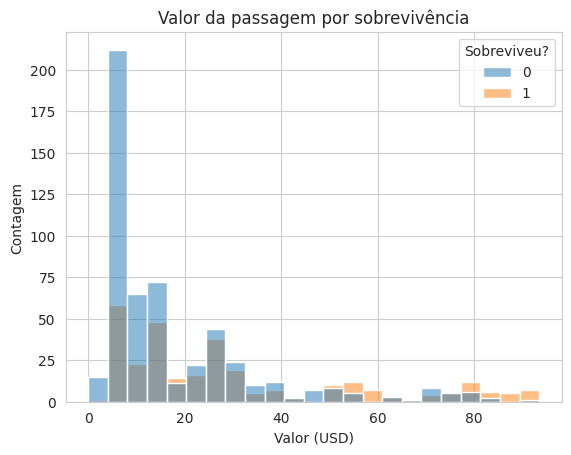

In [70]:
titanic = data[["fare", "survived"]]
titanic = titanic.query("fare < 100")

with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=titanic, x="fare", hue='survived')
  grafico.set(title='Valor da passagem por sobrevivência', xlabel='Valor (USD)', ylabel='Contagem');
  grafico.get_legend().set_title("Sobreviveu?");

### **1.2. KDE** 

O **KDE** (*kernel density estimator*), assim como o **histograma**, representa a distribuição de uma variável numérica, mas em uma distribuição contínua. A variável numérica é segmentada em intervalos representados por uma função contínua estimada. Ajuda a evidênciar a distribuição da variável numérica.

> O método do pacote Seaborn que constrói este gráfico é o `histplot` ([docs](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)). 

Algumas dicas:

 - A variação do tamanho da segmentação por gerar diferentes insights.

Vamos utilizar a base de dados do **titanic**:

In [71]:
import seaborn as sns

In [72]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


*   **Exemplo**: Idade por sobrevivência:

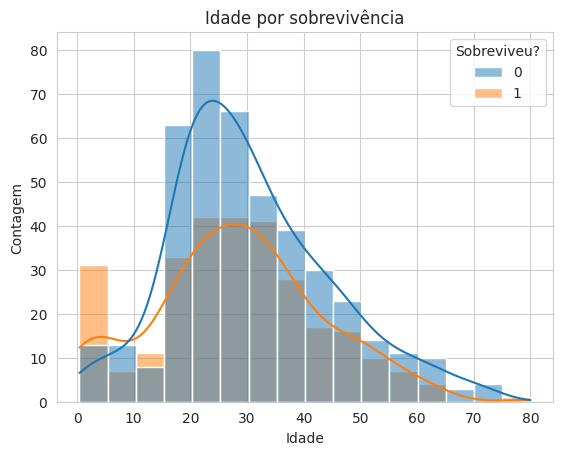

In [73]:
titanic = data[["age", "survived"]]

with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=titanic, x="age", hue="survived", kde=True, bins=16)
  grafico.set(title='Idade por sobrevivência', xlabel='Idade', ylabel='Contagem');
  grafico.get_legend().set_title("Sobreviveu?");

*   **Exemplo**: Idade por sobrevivência por classe:

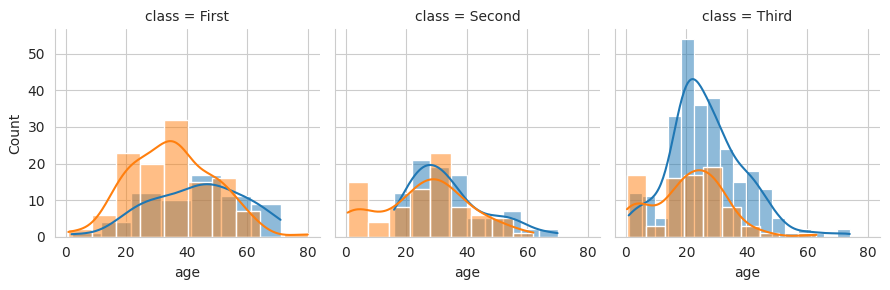

In [74]:
titanic = data[["age", "survived", "class"]]

with sns.axes_style('whitegrid'):
  
  grafico = sns.FacetGrid(data=titanic, col="class",  hue="survived")
  grafico.map(sns.histplot, "age", kde=True)

### **1.3. Box Plot** 

O **Box Plot** representa um resumo da distribuição de uma variável numérica. Numa mesmo gráfico mostra a mediana, quartis e *outliers*. É um dos melhores gráficos para representar a distribuição de uma variável numérica.

> O método do pacote Seaborn que constrói este gráfico é o `boxplot` ([docs](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)). 

Algumas dicas:

 - O box plot esconde a distribuição dos grupos na variável, caso existam.

Vamos utilizar a base de dados do **titanic**:

In [75]:
import seaborn as sns

In [76]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


*   **Exemplo**: Distribuição de idade:

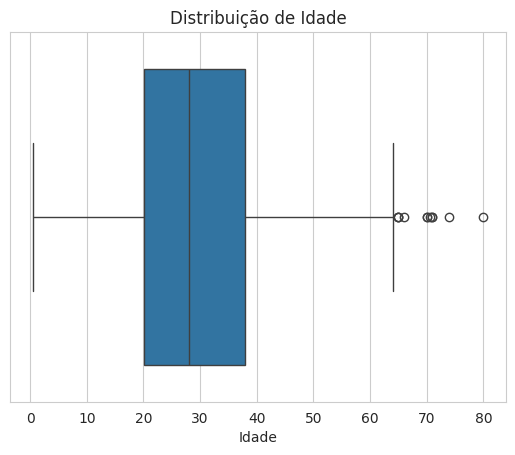

In [77]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data["age"])
  grafico.set(title='Distribuição de Idade', xlabel='Idade');

*   **Exemplo**: Distribuição de idade por classe:

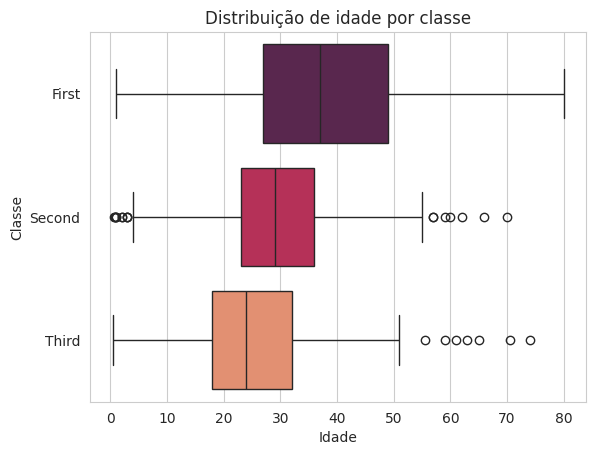

In [78]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data["age"], y=data["class"], hue=data["class"], palette='rocket')
  grafico.set(title="Distribuição de idade por classe", xlabel="Idade", ylabel="Classe");

## 2\. Correlação

### **2.1. Gráfico de Dispersão** 

O **gráfico de dispersão** representa a correlação entre duas variáveis numéricas. Cada valor é representado um ponto P(`x`,`y`). É útil para observar a variação conjunta de duas variáveis.

> O método do pacote Seaborn que constrói este gráfico é o `scatterplot` ([docs](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)). 

Algumas dicas:

 - Evidêncie grupos (uma terceira variável categórica), se houverem.

Vamos utilizar a base de dados **iris**:

In [79]:
import seaborn as sns

In [80]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


*   **Exemplo**: Comprimento da pétala por comprimento da sépala:

In [81]:
iris = data[["sepal_length", "petal_length", "species"]]
iris.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


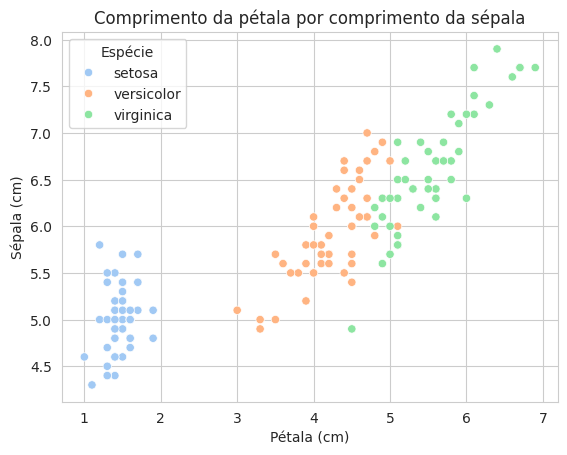

In [82]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=iris, x="petal_length", y="sepal_length", hue="species", palette="pastel")
  grafico.set(title='Comprimento da pétala por comprimento da sépala', xlabel='Pétala (cm)', ylabel='Sépala (cm)');
  grafico.get_legend().set_title("Espécie");

*   **Exemplo**: Largura da pétala por largura da sépala:

In [83]:
iris = data[["petal_width", "sepal_width", "species"]]
iris.head()

,petal_width,sepal_width,species
0,0.2,3.5,setosa
1,0.2,3.0,setosa
2,0.2,3.2,setosa
3,0.2,3.1,setosa
4,0.2,3.6,setosa


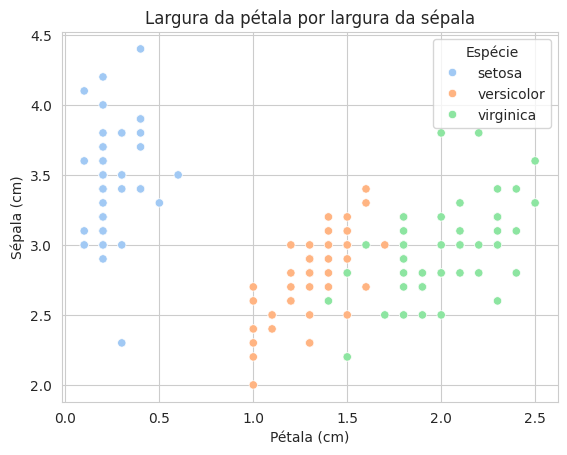

In [84]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=iris, x="petal_width", y="sepal_width", hue="species", palette="pastel")
  grafico.set(title='Largura da pétala por largura da sépala', xlabel='Pétala (cm)', ylabel='Sépala (cm)');
  grafico.get_legend().set_title("Espécie");

### **2.2. Mapa de Calor** 

O **mapa de calor** representação a correlação entre três variáveis, essencialmente uma representação 2D de um gráfico 3D. Cada valor é representado por um ponto com três coordenadas: `x` e `y` indicam a sua posição e o `z` (necessariamente numérica) a sua intensidade. É útil para observar a distribuição geral dos dados.

> O método do pacote Seaborn que constrói este gráfico é o `heatmap` ([doc](https://seaborn.pydata.org/generated/seaborn.heatmap.html)). 

Algumas dicas:

 - A paleta de cores é muito importante.

Vamos utilizar a base de dados de **vôos**:

In [85]:
import seaborn as sns

In [86]:
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


*   **Exemplo**: Distribuição de passageiros por mês por ano:

In [87]:
flights = data.pivot(index="month", columns="year", values="passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


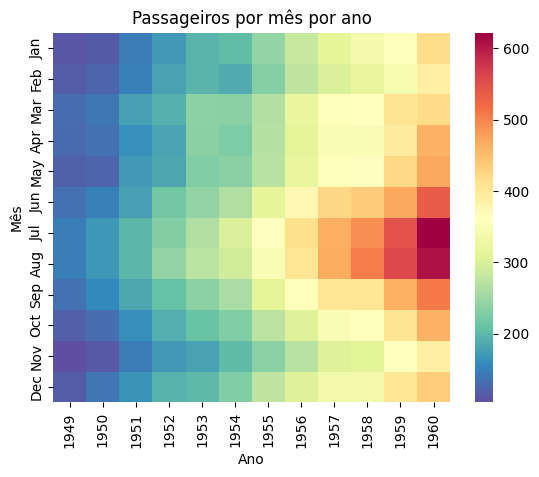

In [88]:
grafico = sns.heatmap(data=flights, cmap="Spectral_r")
grafico.set(title='Passageiros por mês por ano', xlabel='Ano', ylabel='Mês');

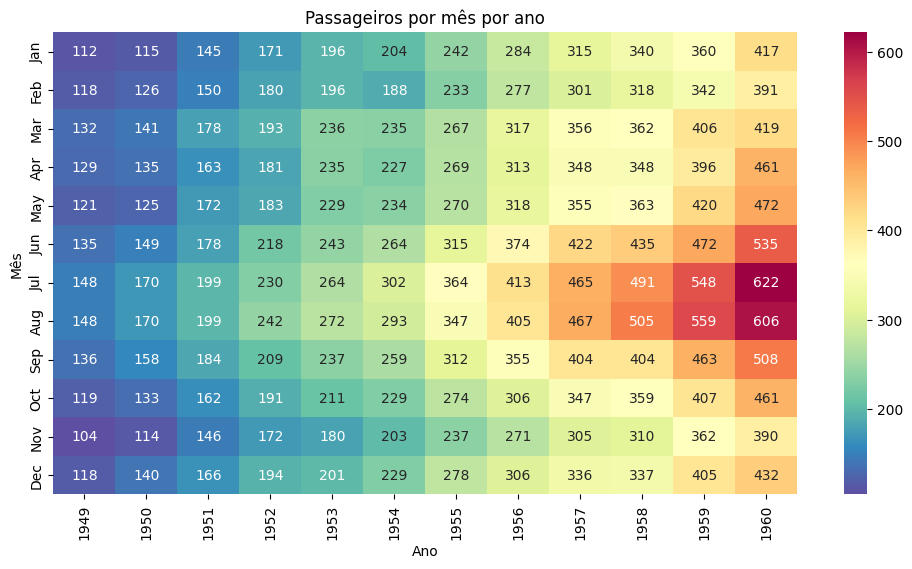

In [89]:
grafico = sns.heatmap(data=flights, cmap="Spectral_r", annot=True, fmt="d")
grafico.set(title='Passageiros por mês por ano', xlabel='Ano', ylabel='Mês');
grafico.figure.set_size_inches(w=12, h=6)

In [90]:
data = sns.load_dataset("flights")

In [91]:
flights = data.pivot(index="year", columns="month", values="passengers")
flights.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


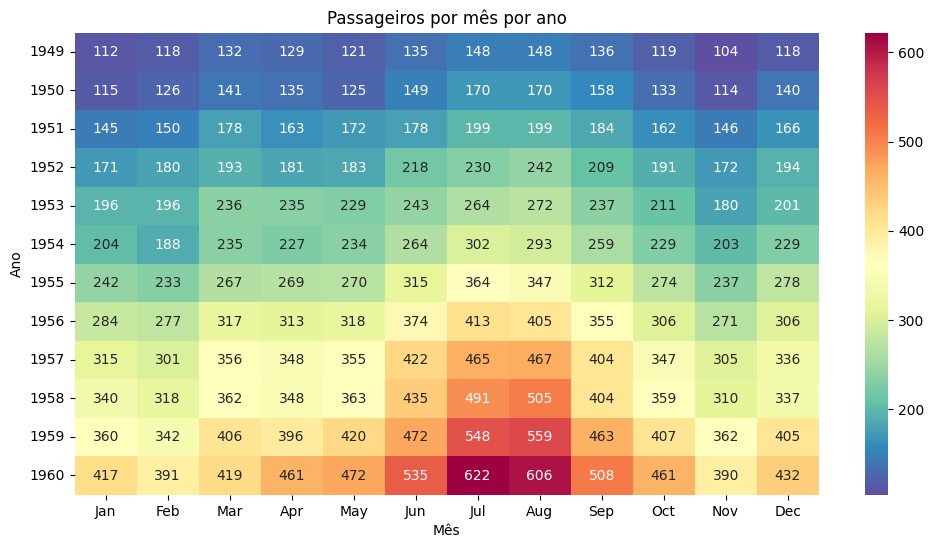

In [92]:
grafico = sns.heatmap(data=flights, cmap="Spectral_r", annot=True, fmt='d')
grafico.set(title='Passageiros por mês por ano', xlabel='Mês', ylabel='Ano')
grafico.figure.set_size_inches(w=12, h=6);